In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
rs = pd.read_csv('D:\\python_data\\rain_sensor\\raw_data\\total_\\merge.csv')

In [5]:
# NAN 데이터 Drop
rs = rs.dropna()
# m_total = m_total.dropna()


In [6]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4049288 entries, 0 to 4424033
Data columns (total 9 columns):
c1      float64
c2      float64
c3      float64
c4      float64
c5      float64
c6      float64
c7      float64
c8      float64
rain    int64
dtypes: float64(8), int64(1)
memory usage: 308.9 MB


In [7]:
print(rs)

            c1     c2     c3     c4     c5     c6     c7     c8  rain
0        776.0  775.0  762.0  792.0  772.0  829.0  788.0  802.0    20
1        772.0  773.0  764.0  798.0  768.0  829.0  780.0  800.0    20
2        780.0  781.0  763.0  798.0  772.0  821.0  788.0  809.0    20
3        775.0  782.0  762.0  797.0  777.0  828.0  783.0  806.0    20
4        777.0  782.0  764.0  795.0  771.0  830.0  791.0  810.0    20
5        777.0  778.0  776.0  795.0  771.0  836.0  791.0  804.0    20
6        777.0  774.0  770.0  797.0  773.0  828.0  791.0  800.0    20
7        781.0  776.0  772.0  799.0  775.0  830.0  791.0  798.0    20
8        779.0  778.0  774.0  795.0  769.0  828.0  795.0  800.0    20
9        775.0  778.0  768.0  801.0  775.0  828.0  791.0  804.0    20
10       775.0  774.0  772.0  797.0  775.0  828.0  793.0  800.0    20
11       773.0  778.0  772.0  805.0  775.0  830.0  795.0  804.0    20
12       771.0  780.0  772.0  797.0  769.0  830.0  793.0  800.0    20
13       767.0  777.

In [8]:
rs['rain'].unique()

array([20, 35], dtype=int64)

In [100]:
from sklearn.preprocessing import LabelEncoder
X = rs.iloc[:,4:8].values
y = rs.iloc[:,8].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [101]:
X

array([[772., 829., 788., 802.],
       [768., 829., 780., 800.],
       [772., 821., 788., 809.],
       ...,
       [769., 831., 787., 803.],
       [771., 819., 783., 803.],
       [763., 829., 791., 803.]])

In [102]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100000) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3239430, 4), (809858, 4), (3239430, 2), (809858, 2))

In [131]:
model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='sigmoid'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 64)                320       
_________________________________________________________________
dense_140 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


In [138]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size= 100000) #,batch_size= 200

Train on 3239430 samples, validate on 809858 samples
Epoch 1/10
3239430/3239430 [==============================] - 16s 5us/step - loss: 0.6236 - acc: 0.6610 - val_loss: 0.6190 - val_acc: 0.6644
Epoch 2/10
3239430/3239430 [==============================] - 16s 5us/step - loss: 0.6172 - acc: 0.6647 - val_loss: 0.6134 - val_acc: 0.6675
Epoch 3/10
3239430/3239430 [==============================] - 15s 5us/step - loss: 0.6120 - acc: 0.6669 - val_loss: 0.6092 - val_acc: 0.6688
Epoch 4/10
3239430/3239430 [==============================] - 15s 5us/step - loss: 0.6084 - acc: 0.6679 - val_loss: 0.6060 - val_acc: 0.6683
Epoch 5/10
3239430/3239430 [==============================] - 15s 5us/step - loss: 0.6059 - acc: 0.6689 - val_loss: 0.6037 - val_acc: 0.6714
Epoch 6/10
3239430/3239430 [==============================] - 18s 6us/step - loss: 0.6046 - acc: 0.6697 - val_loss: 0.6029 - val_acc: 0.6718
Epoch 7/10
3239430/3239430 [==============================] - 16s 5us/step - loss: 0.6027 - acc: 0.67

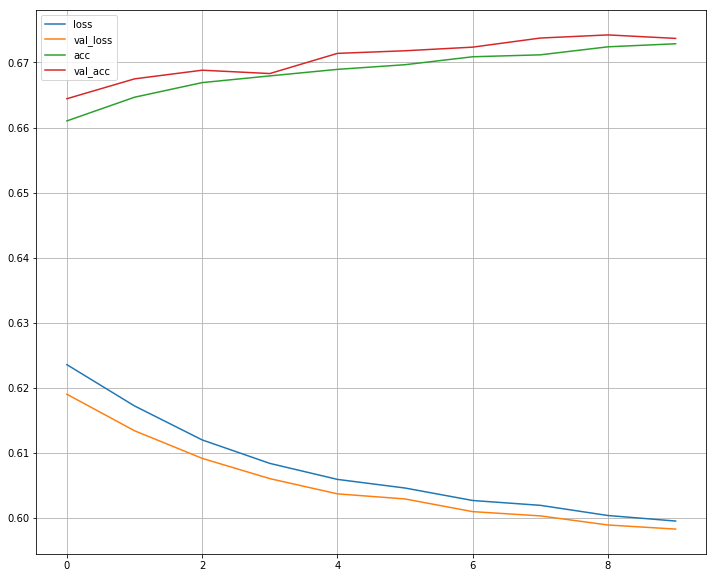

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [143]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

809858/809858 [==============================] - 17s 21us/step
Accuracy = 0.67


In [144]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71    425268
           1       0.69      0.58      0.63    384590

   micro avg       0.67      0.67      0.67    809858
   macro avg       0.68      0.67      0.67    809858
weighted avg       0.68      0.67      0.67    809858

[[322943 102325]
 [161936 222654]]


In [145]:
test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted target name: {}".format(
    rs['rain'].unique()[model.predict_classes(test_set)]))

Predicted target name: [20]
